### What is Web Scarping
Web scraping is a term used to describe the use of a program or algorithm to extract large amounts of data from the web.

### Why Web Scraping?
Let’s suppose you want to get some information from a website? What will you do? 

The first thing that may come in your mind is to copy and paste the information into your local media. But what if you want a large amount of data on a daily basis and as quickly as possible. In such situations, copy and paste will not work and that’s where you’ll need web scraping.

Whether you are a data scientist, engineer, or anybody who analyzes large amounts of datasets, the ability to scrape data from the web is a useful skill to have.

### Web Scraping Tools and Libraries

There are several efficient web scraping tools and libraries available in various programming languages. The choice of tool depends on your specific requirements and the programming language you are comfortable with. Here is a list of some popular and efficient web scraping tools:

* Selenium
* Beautiful Soup
* Scrapy

### What is Selenium
Selenium is a popular open-source framework in Python used for automating web browsers. It provides a way to interact with web pages, simulate user actions, and extract data from websites programmatically.

###### Installation Selenium
Selenium can be installed after you have installed python on your operating system.

In [1]:
# !pip install selenium

###### Installing Webdriver
For using Chrome you may need to install Chromium

* URL: https://chromedriver.chromium.org/downloads 
* Version: 116.0.5845.141 (64-bit) 
* Chromedriver: https://edgedl.me.gvt1.com/edgedl/chrome/chrome-for-testing/116.0.5845.96/win64/chromedriver-win64.zip

###### IMDB 

The objective is to scrape IMDb's top 250 movies, extracting details such as rank, title, rating, duration etc. This data will be structured into a dataset for analysis and visualization.

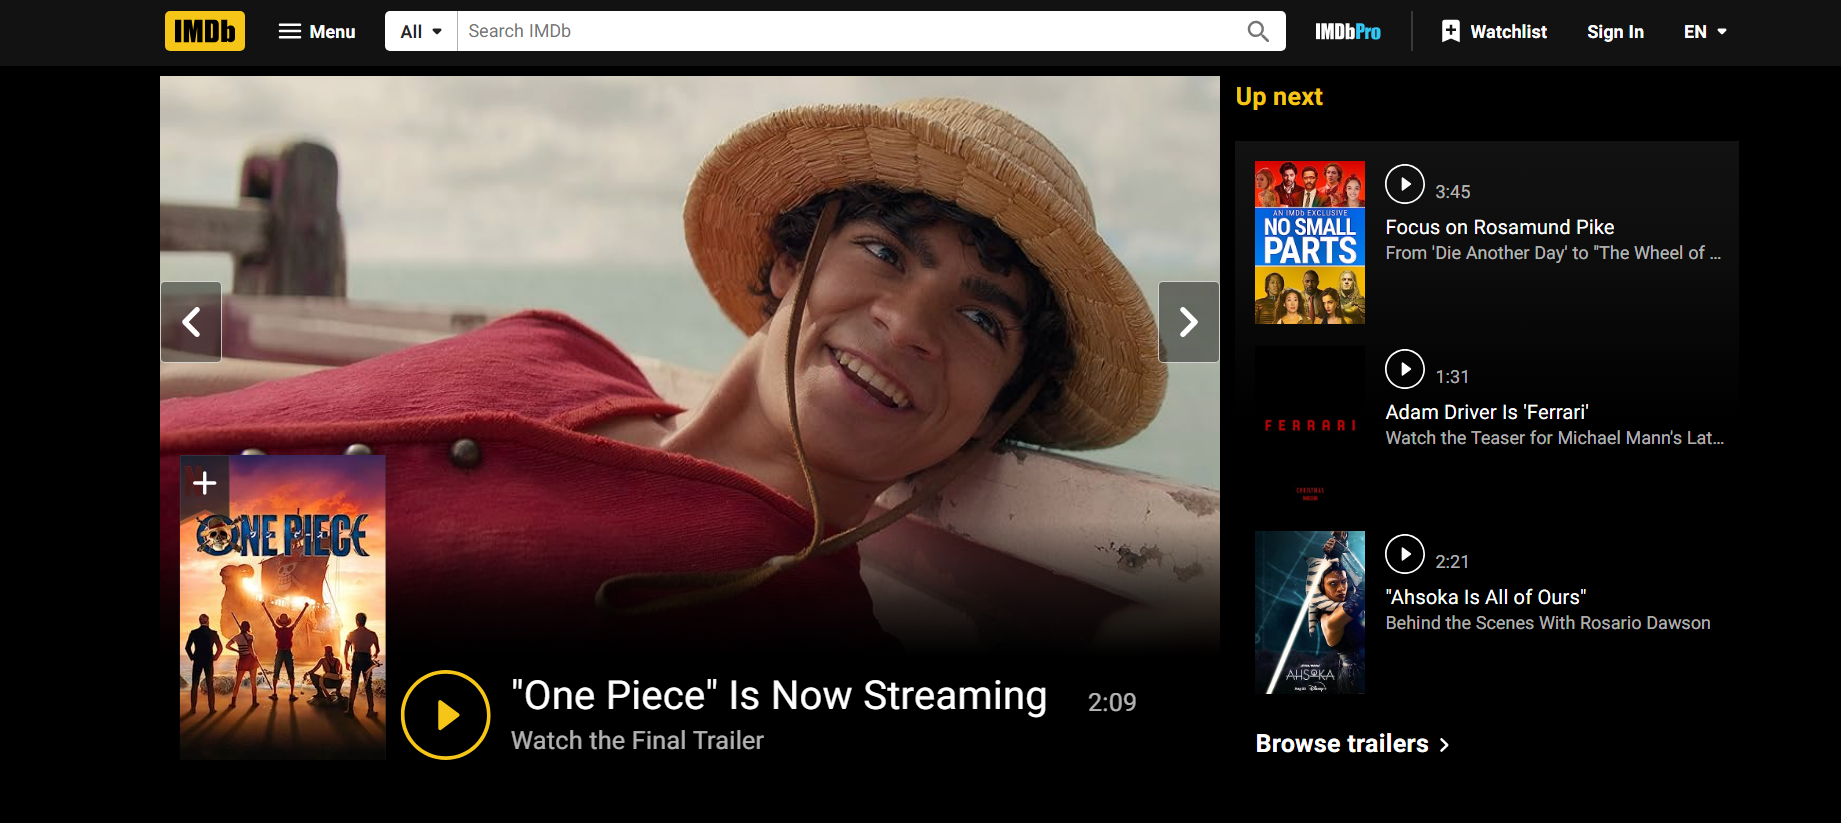

In [2]:
# Importing Required Libraries
import time
import pandas as pd
from random import randint
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Creating Web Instance
driver = webdriver.Chrome()

In [5]:
# Navigating to the IMDb website
driver.get('https://www.imdb.com/')

###### Let's Deep Dive in Web Scraping

In [6]:
# Finding header
header = driver.find_element(By.ID, "imdbHeader")

In [7]:
# Finding Menu Button
menu_btn = header.find_element(By.ID, "imdbHeader-navDrawerOpen")

In [8]:
# Clicking Menu Button
menu_btn.click()

In [9]:
# Looking For anchor tag
anchor_tag = menu_btn.find_element(By.XPATH, '//div/div[2]/div/div[1]/span/div/div/ul/a[2]')
print(anchor_tag.get_attribute("href"))

https://www.imdb.com/chart/top/?ref_=nv_mv_250


In [10]:
# Navigating to the Top 250 Movies page 
driver.get(anchor_tag.get_attribute("href"))

In [11]:
# Finding movies unordered list
ul_tag = driver.find_element(By.CLASS_NAME, "ipc-metadata-list")

In [12]:
# Finding each list tag
li_tags = ul_tag.find_elements(By.TAG_NAME, 'li')

In [13]:
len(li_tags)

250

### For Movie Rank and Name Extraction

In [14]:
heading = [i.find_element(By.TAG_NAME, "h3").text for i in li_tags]
print(len(heading))
print(heading[:5])

250
['1. The Shawshank Redemption', '2. The Godfather', '3. The Dark Knight', '4. The Godfather Part II', '5. 12 Angry Men']


In [15]:
rank = []
name = []
for i in heading:
    i = i.split(maxsplit=1, sep=" ")
    rank.append(i[0].strip("."))
    name.append(i[1])

In [16]:
print(len(rank))
print(rank[:5])

250
['1', '2', '3', '4', '5']


In [17]:
print(len(name))
print(name[:5])

250
['The Shawshank Redemption', 'The Godfather', 'The Dark Knight', 'The Godfather Part II', '12 Angry Men']


### For Movie Year, Duration and Category Extraction

In [18]:
meta_data_1 = [i.find_elements(By.CSS_SELECTOR, '[class="sc-b51a3d33-6 faLXbD cli-title-metadata-item"]') for i in li_tags]

In [19]:
year = [i[0].text for i in meta_data_1]
print(len(year))
print(year[:5])

250
['1994', '1972', '2008', '1974', '1957']


In [20]:
duration = [i[1].text for i in meta_data_1]
print(len(duration))
print(duration[:5])

250
['2h 22m', '2h 55m', '2h 32m', '3h 22m', '1h 36m']


In [21]:
#category = [i[2].text for i in meta_data_1]
#category[:5]

In [22]:
for i in meta_data_1:
    if len(i) != 3:
        print(len(i))

2


In [23]:
category = []
for i in meta_data_1:
    if len(i) == 3:
        category.append(i[2].text)
    else:
        category.append(None)
print(len(category))
print(category[:5])

250
['R', 'R', 'PG-13', 'R', 'Approved']


### For Movie Rating and Views Extraction

In [24]:
meta_data_2 = [i.find_element(By.CSS_SELECTOR, '[class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating"]').text for i in li_tags]

In [25]:
rating = []
views = []
for i in meta_data_2:
    i = i.split("\n ")
    rating.append(i[0])
    views.append(i[1].strip('()'))

In [26]:
print(len(rating))
print(rating[:5])

250
['9.3', '9.2', '9.0', '9.0', '9.0']


In [27]:
print(len(views))
print(views[:5])

250
['2.8M', '2M', '2.8M', '1.3M', '832K']


### Creating Data Frame

In [28]:
imdb_dataset = pd.DataFrame()
imdb_dataset['Rank'] = rank
imdb_dataset['Name'] = name
imdb_dataset['Rating'] = rating
imdb_dataset['Duration'] = duration
imdb_dataset['Category'] = category
imdb_dataset['Year'] = year
imdb_dataset['Views'] = views

In [29]:
imdb_dataset.head()

,Rank,Name,Rating,Duration,Category,Year,Views
0,1,The Shawshank Redemption,9.3,2h 22m,R,1994,2.8M
1,2,The Godfather,9.2,2h 55m,R,1972,2M
2,3,The Dark Knight,9.0,2h 32m,PG-13,2008,2.8M
3,4,The Godfather Part II,9.0,3h 22m,R,1974,1.3M
4,5,12 Angry Men,9.0,1h 36m,Approved,1957,832K


### Getting the each movie URL from behind the title

In [30]:
url = [i.find_element(By.TAG_NAME, "a").get_attribute('href') for i in li_tags]
print(len(url))
print(url[:5])

250
['https://www.imdb.com/title/tt0111161/?ref_=chttp_i_1', 'https://www.imdb.com/title/tt0068646/?ref_=chttp_i_2', 'https://www.imdb.com/title/tt0468569/?ref_=chttp_i_3', 'https://www.imdb.com/title/tt0071562/?ref_=chttp_i_4', 'https://www.imdb.com/title/tt0050083/?ref_=chttp_i_5']


In [31]:
imdb_dataset["IMDB URL"] = url

In [32]:
imdb_dataset.head()

,Rank,Name,Rating,Duration,Category,Year,Views,IMDB URL
0,1,The Shawshank Redemption,9.3,2h 22m,R,1994,2.8M,https://www.imdb.com/title/tt0111161/?ref_=cht...
1,2,The Godfather,9.2,2h 55m,R,1972,2M,https://www.imdb.com/title/tt0068646/?ref_=cht...
2,3,The Dark Knight,9.0,2h 32m,PG-13,2008,2.8M,https://www.imdb.com/title/tt0468569/?ref_=cht...
3,4,The Godfather Part II,9.0,3h 22m,R,1974,1.3M,https://www.imdb.com/title/tt0071562/?ref_=cht...
4,5,12 Angry Men,9.0,1h 36m,Approved,1957,832K,https://www.imdb.com/title/tt0050083/?ref_=cht...


### Getting the each movie plot for starting 10.

In [33]:
description = []
for i in imdb_dataset['IMDB URL'][:10]:
    driver.get(i)
    # time.sleep(randint(1,5))
    try:
        description.append(driver.find_element(By.CSS_SELECTOR, '[data-testid="plot"]').text)
    except NoSuchElementException:
        description.append(None)

In [34]:
driver.quit()

In [35]:
print(len(description))
print(description[:5])

10
['Over the course of several years, two convicts form a friendship, seeking consolation and, eventually, redemption through basic compassion.', 'Don Vito Corleone, head of a mafia family, decides to hand over his empire to his youngest son Michael. However, his decision unintentionally puts the lives of his loved ones in grave danger.', 'When the menace known as the Joker wreaks havoc and chaos on the people of Gotham, Batman must accept one of the greatest psychological and physical tests of his ability to fight injustice.', 'The early life and career of Vito Corleone in 1920s New York City is portrayed, while his son, Michael, expands and tightens his grip on the family crime syndicate.', 'The jury in a New York City murder trial is frustrated by a single member whose skeptical caution forces them to more carefully consider the evidence before jumping to a hasty verdict.']


In [36]:
imdb = imdb_dataset.head(10)

In [37]:
imdb["Plot"] = description

In [38]:
imdb.head()

,Rank,Name,Rating,Duration,Category,Year,Views,IMDB URL,Plot
0,1,The Shawshank Redemption,9.3,2h 22m,R,1994,2.8M,https://www.imdb.com/title/tt0111161/?ref_=cht...,"Over the course of several years, two convicts..."
1,2,The Godfather,9.2,2h 55m,R,1972,2M,https://www.imdb.com/title/tt0068646/?ref_=cht...,"Don Vito Corleone, head of a mafia family, dec..."
2,3,The Dark Knight,9.0,2h 32m,PG-13,2008,2.8M,https://www.imdb.com/title/tt0468569/?ref_=cht...,When the menace known as the Joker wreaks havo...
3,4,The Godfather Part II,9.0,3h 22m,R,1974,1.3M,https://www.imdb.com/title/tt0071562/?ref_=cht...,The early life and career of Vito Corleone in ...
4,5,12 Angry Men,9.0,1h 36m,Approved,1957,832K,https://www.imdb.com/title/tt0050083/?ref_=cht...,The jury in a New York City murder trial is fr...


### THANK YOU FOR WATCHING